## One-way and two-way ANOVA (Part I)

Recall the following definitions:

- One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
- Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.

In [26]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
diamonts_raw = sns.load_dataset('diamonds', cache=False)
diamonts_raw.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning

In [3]:
diamonts_raw['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
color_count = diamonts_raw['color'].value_counts().reset_index()
color_count['frequency'] = round((color_count['count'] / diamonts_raw.shape[0]) *100,2)

color_count

,color,count,frequency
0,G,11292,20.93
1,E,9797,18.16
2,F,9542,17.69
3,H,8304,15.39
4,D,6775,12.56
5,I,5422,10.05
6,J,2808,5.21


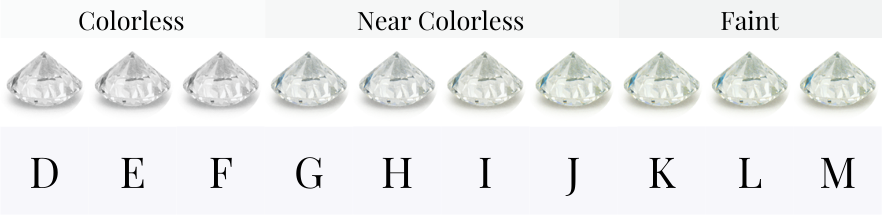

I took a subset of colorless and near colorless diamonds. I excluded G color grade diamonds as there were many more of them, and I excluded J color grade diamonds as there were significantly fewer of them

In [5]:
colorless = diamonts_raw[~diamonts_raw['color'].isin(['G','J'])][['color','price']]
colorless.reset_index(drop=True,inplace=True)
colorless

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336
...,...,...
39835,D,2757
39836,D,2757
39837,D,2757
39838,H,2757


In [6]:
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [7]:
colorless['color'] = colorless['color'].cat.remove_categories(['G','J'])
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [8]:
colorless.head()

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336


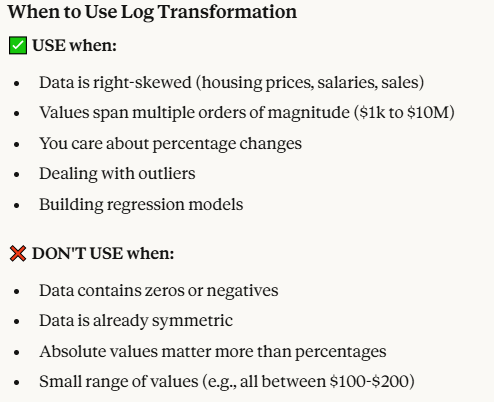

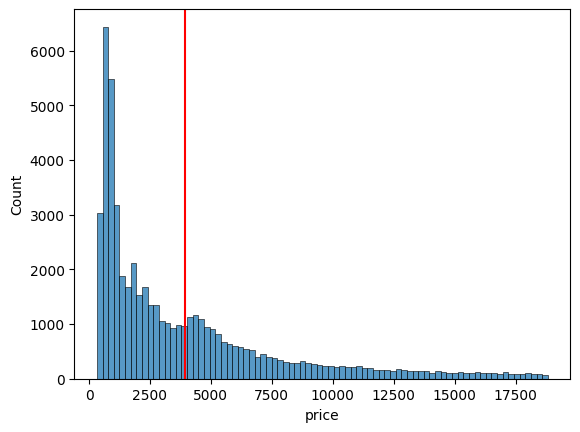

In [9]:
sns.histplot(diamonts_raw['price'])

plt.axvline(diamonts_raw['price'].mean(), color = 'red')

In [10]:
colorless['log_price'] = colorless.apply( lambda row: round(math.log(row['price']),3), axis = 1)
colorless

,color,price,log_price
0,E,326,5.787
1,E,326,5.787
2,E,327,5.790
3,I,334,5.811
4,I,336,5.817
...,...,...,...
39835,D,2757,7.922
39836,D,2757,7.922
39837,D,2757,7.922
39838,H,2757,7.922


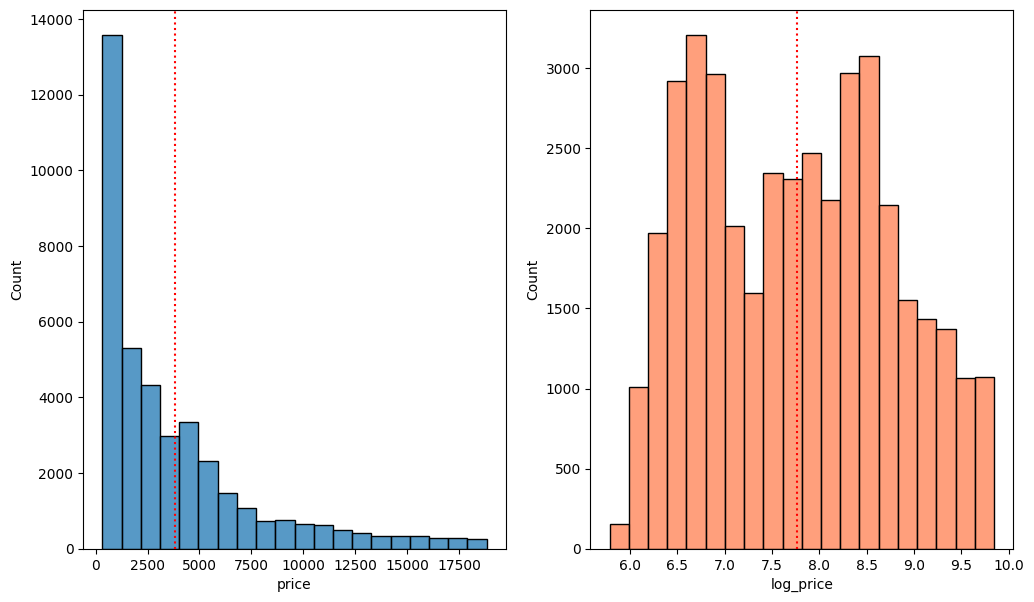

In [11]:
fig, axes = plt.subplots(1,2,figsize= (12,7))

sns.histplot(
    colorless['price'],
    ax= axes[0],
    bins= 20
)

sns.histplot(
    colorless['log_price'],
    ax= axes[1],
    color='coral',
    bins = 20
)

axes[0].axvline(colorless['price'].mean(),color='red',ls=':')
axes[1].axvline(colorless['log_price'].mean(),color='red',ls=':')

In [12]:
# Save the new clean data
colorless.to_csv('./raw_data/diamonts_clean.csv',index=False,header=list(colorless.columns))

## One-way ANOVA

In [13]:
diamonts = pd.read_csv('./raw_data/diamonts_clean.csv')
diamonts.head()

,color,price,log_price
0,E,326,5.787
1,E,326,5.787
2,E,327,5.790
3,I,334,5.811
4,I,336,5.817


one-way ANOVA helps to better understand the relationship between a categorical variable and a continuous variable

C:\Users\andre\AppData\Local\Temp\ipykernel_2580\1669847145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_2580\1669847145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='color', ylabel='price'>

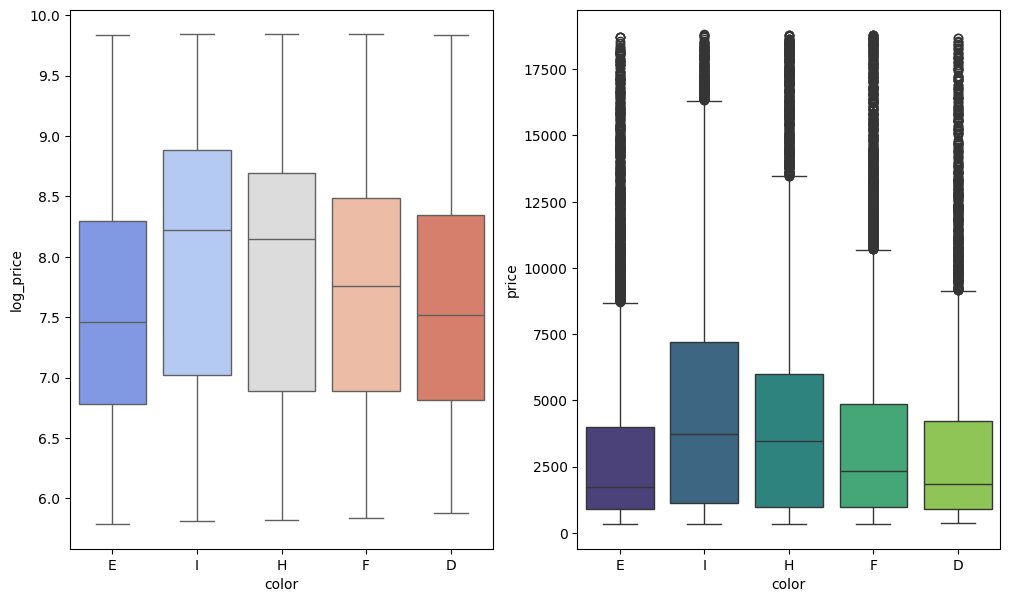

In [20]:
fig, axes = plt.subplots(1,2,figsize=(12,7))

sns.boxplot(
    data = diamonts,
    x = 'color',
    y = 'log_price',
    ax = axes[0],
    palette='coolwarm'
)

sns.boxplot(
    data= diamonts,
    x = 'color',
    y = 'price',
    ax = axes[1],
    palette='viridis'
)

***
### Create the model

In [27]:
price_color_model = ols(formula = 'log_price ~ C(color)', data = diamonts).fit()
price_color_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Fri, 23 Jan 2026   Prob (F-statistic):          3.52e-225
Time:                        11:19:08   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.423      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.395      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.241      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.580      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.478      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.256   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.819
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f(log_price) = ((Color_I[0/1])*0.4061) + ((Color_H[0/1])*0.3015) + ((Color_F[0/1])*(0.1455)) + ((Color_E[0/1])*(-0.0375)) + 7.6169

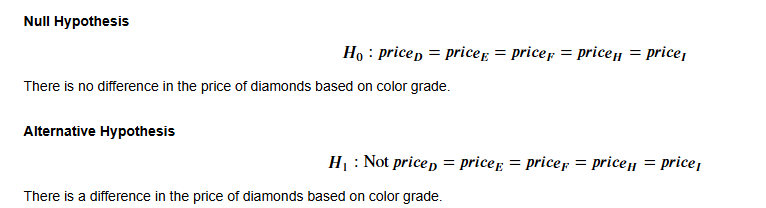

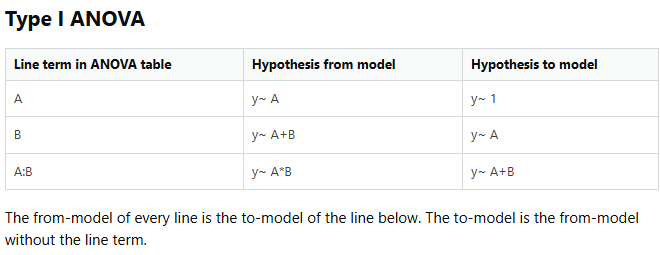

In [28]:
# Run oneway ANOVA

sm.stats.anova_lm(price_color_model,typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.734757,260.433689,265.000059,3.521965e-225
Residual,39835.0,39148.579930,0.982768,NaN,NaN


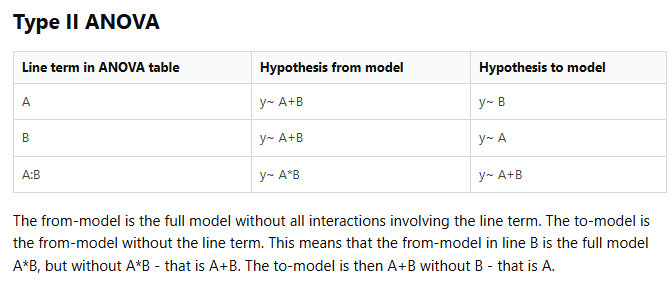

In [29]:
sm.stats.anova_lm(price_color_model,typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.734757,4.0,265.000059,3.521965e-225
Residual,39148.579930,39835.0,NaN,NaN


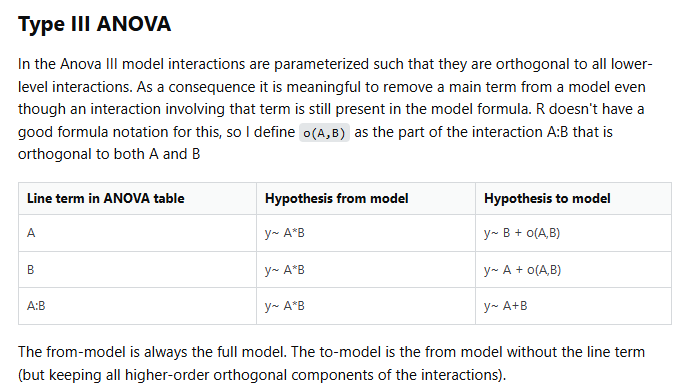

In [30]:
sm.stats.anova_lm(price_color_model,typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.990146,1.0,399958.914992,0.000000e+00
C(color),1041.734757,4.0,265.000059,3.521965e-225
Residual,39148.579930,39835.0,NaN,NaN


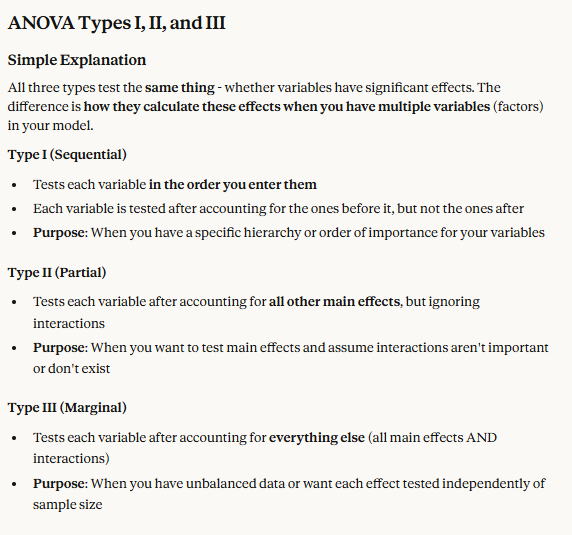

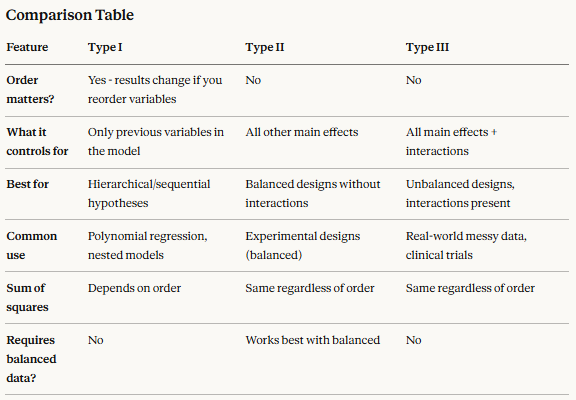

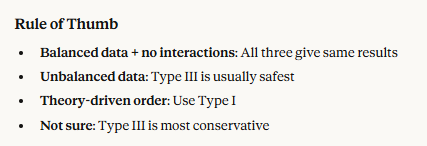